## Data Cleaning and Dealing with Missing Data

This project works on exit survey of Department of Education, Training and Employment [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and Technical and Further Education [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

In this project, we try to answer the following questions:
 - why are employees leaving their job? Is this related to their tenure?
 - Do the youth tend to leave the job more often than oder employees?

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
dete_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

dete survey has 822 records and 56 columns. There are 6 columns that have less than 150 non-null values. Most of the columns are either object (string) or boolean type.

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

tafe survey has 702 records with 72 columns. Most of the columns are of object type. Several columns have missing values.

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


dete data has NaN values as 'Not Stated'. We have to read them as NaN. Furthermore, we do not need many of the columns.

In [6]:
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])

In [7]:
dete_survey.drop(dete_survey.columns[28:49], axis=1, inplace=True)
tafe_survey.drop(tafe_survey.columns[17:66],axis=1, inplace=True)

In [8]:
dete_survey.columns=dete_survey.columns.str.lower().str.strip().str.replace(' ', '_')

In [9]:
dict_names ={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [10]:
tafe_survey.rename(dict_names, axis=1, inplace=True)

In [11]:
tafe_survey.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [12]:
dete_survey.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


We renamed and converted the names of columns into snake case so that they are easier to work with.

In [13]:
dete_survey['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
tafe_survey['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [15]:
dete_resignations = dete_survey[dete_survey['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey[tafe_survey['separationtype']=='Resignation'].copy()

We have created two dataframes that contain only resignations in both surveys.

In [16]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [17]:
dete_resignations['cease_date']=dete_resignations['cease_date'].str.extract("([0-9]{4})", expand=False).astype(float)

In [18]:
#dete_resignations['cease_date']=dete_resignations['cease_date'].astype(float).copy()

In [19]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [20]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [21]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

We have checked the years and they do not have any anomalies or outliers.

In [22]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']

This column will help us determine the service duration of employees.

In [23]:
def update_vals(vals):
    if pd.isnull(vals): return np.nan
    if vals=='-': return False
    return True

In [24]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [25]:
cols =['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
new=tafe_resignations[cols].copy()
new=new.applymap(update_vals)
tafe_resignations['dissatisfied']=new.any(axis=1, skipna=False)

In [26]:
dete_resignations['dissatisfied']=dete_resignations['job_dissatisfaction']

In [27]:
dete_up = dete_resignations.copy()
tafe_up = tafe_resignations.copy()

We have obtained all the records that have dissatisfaction with the job and for that reason they resigned.

In [28]:
dete_up['institute'] = 'DETE'
tafe_up['institute'] = 'TAFE'

In [29]:
combined = pd.concat([dete_up, tafe_up], axis=0)

In [30]:
combined['dissatisfied'].value_counts(dropna=False)

False    511
True     132
NaN        8
Name: dissatisfied, dtype: int64

In [31]:
combined.dropna(axis=1, thresh=500, inplace=True)

We have combined both dataframes that include only employees who resigned from the job due to their dissatisfaction. We also dropped columns that have less than 500 non-null records.

In [32]:
combined['institute_service'].value_counts().sum()

563

In [33]:
combined['institute_service'].astype(str).str.extract("([0-9][0-9]?)", expand=True)[0].value_counts().sum()

563

In [34]:
combined['institute_service']=combined['institute_service'].astype(str).str.extract("([0-9][0-9]?)", expand=True)[0].astype(float).copy()

In [35]:
def career(val):
    if pd.isnull(val): return np.nan
    elif val<3: return 'New'
    elif 3<=val<=6: return 'Experienced'
    elif 7<=val<=10: return 'Established'
    return 'Veteran'

In [36]:
combined['service_cat'] = combined['institute_service'].apply(career)

Instead of looking at the age of the employees as their work experience, we divided their experience into 4 different categories which better represent why they might be dissatisfied from the job.

In [37]:
combined['dissatisfied'].value_counts(dropna=False)

False    511
True     132
NaN        8
Name: dissatisfied, dtype: int64

In [38]:
combined['dissatisfied'].fillna(False, inplace=True)

In [42]:
dissatisfied_perc = combined.pivot_table(index='service_cat', values=['dissatisfied'])
dissatisfied_perc

,dissatisfied
service_cat,
Established,0.241935
Experienced,0.197674
New,0.207254
Veteran,0.191176


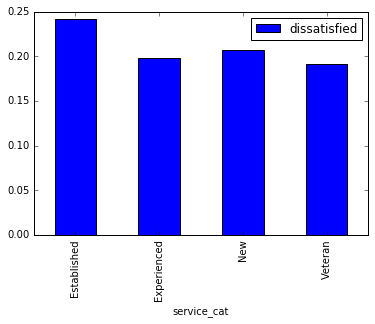

In [43]:
%matplotlib inline
dissatisfied_perc.plot(kind='bar')

From the bar plot above, we can observe that employees with 7-10 years of work experience are dissatisfied from their jobs. The next group of people who have the highest dissatisfaction from job is new employees.